In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import *
from sklearn.discriminant_analysis import *
from sklearn.naive_bayes import *
from sklearn.tree import *
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import xgboost
%matplotlib inline

# DATA IMPORT

In [28]:
train = pd.read_csv('/home/yjoung90/Documents/datascience/teamproject2/data/train.csv')
test = pd.read_csv('/home/yjoung90/Documents/datascience/teamproject2/data/test.csv')
sample_submission = pd.read_csv('/home/yjoung90/Documents/datascience/teamproject2/data/sample_submission.csv')

# DATA STRUCTURE

In [29]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [30]:
print(train.shape, train.columns)

(647054, 7) Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')


In [31]:
train.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [32]:
train.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [33]:
print(len(train['FinelineNumber'].unique()))
print(train['FinelineNumber'].unique())

5196
[1000. 8931. 4504. ... 8257. 4314. 7130.]


In [34]:
print(len(train['DepartmentDescription'].unique()))
print(train['DepartmentDescription'].unique())

69
['FINANCIAL SERVICES' 'SHOES' 'PERSONAL CARE' 'PAINT AND ACCESSORIES'
 'DSD GROCERY' 'MEAT - FRESH & FROZEN' 'DAIRY' 'PETS AND SUPPLIES'
 'HOUSEHOLD CHEMICALS/SUPP' nan 'IMPULSE MERCHANDISE' 'PRODUCE'
 'CANDY, TOBACCO, COOKIES' 'GROCERY DRY GOODS' 'BOYS WEAR'
 'FABRICS AND CRAFTS' 'JEWELRY AND SUNGLASSES' 'MENS WEAR' 'ACCESSORIES'
 'HOME MANAGEMENT' 'FROZEN FOODS' 'SERVICE DELI'
 'INFANT CONSUMABLE HARDLINES' 'PRE PACKED DELI' 'COOK AND DINE'
 'PHARMACY OTC' 'LADIESWEAR' 'COMM BREAD' 'BAKERY' 'HOUSEHOLD PAPER GOODS'
 'CELEBRATION' 'HARDWARE' 'BEAUTY' 'AUTOMOTIVE' 'BOOKS AND MAGAZINES'
 'SEAFOOD' 'OFFICE SUPPLIES' 'LAWN AND GARDEN' 'SHEER HOSIERY' 'WIRELESS'
 'BEDDING' 'BATH AND SHOWER' 'HORTICULTURE AND ACCESS' 'HOME DECOR' 'TOYS'
 'INFANT APPAREL' 'LADIES SOCKS' 'PLUS AND MATERNITY' 'ELECTRONICS'
 'GIRLS WEAR, 4-6X  AND 7-14' 'BRAS & SHAPEWEAR' 'LIQUOR,WINE,BEER'
 'SLEEPWEAR/FOUNDATIONS' 'CAMERAS AND SUPPLIES' 'SPORTING GOODS'
 'PLAYERS AND ELECTRONICS' 'PHARMACY RX' 'MENSWEAR' 'OP

In [35]:
print(len(train['TripType'].unique()))
print(train['TripType'].unique())

38
[999  30  26   8  35  41  21   6  42   7   9  39  25  38  15  36  20  37
  32  40   5   3   4  24  33  43  31  27  34  18  29  44  19  23  22  28
  14  12]


In [36]:
test.tail()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
653641,191348,Sunday,6.657211e+10,1,BATH AND SHOWER,1505.0
653642,191348,Sunday,8.818139e+10,1,BATH AND SHOWER,1099.0
653643,191348,Sunday,4.282557e+09,1,MENS WEAR,8220.0
653644,191348,Sunday,8.046919e+10,1,SWIMWEAR/OUTERWEAR,114.0
653645,191348,Sunday,7.871536e+09,1,MENS WEAR,4923.0


In [37]:
print(test.shape, test.columns)

(653646, 6) Index(['VisitNumber', 'Weekday', 'Upc', 'ScanCount', 'DepartmentDescription',
       'FinelineNumber'],
      dtype='object')


In [38]:
sample_submission.tail()

,VisitNumber,TripType_3,TripType_4,TripType_5,TripType_6,TripType_7,TripType_8,TripType_9,TripType_12,TripType_14,...,TripType_36,TripType_37,TripType_38,TripType_39,TripType_40,TripType_41,TripType_42,TripType_43,TripType_44,TripType_999
95669,191338,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95670,191339,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95671,191340,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95672,191341,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95673,191348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [40]:
def find_missing_values(df):
    try:

        missing = df.isnull().sum()
        missing = missing[missing >0]

        missing.sort_values(inplace = True)
        print(missing)

        missing.plot(kind = 'bar')
        plt.show()
        
    except:
        print("No missing values")
        
def missing_values_idx(df):
    
    missing = df.isnull().sum()
    missing = missing[missing >0]

    missing_col = missing.index

    for col in missing_col:
        missing_idx = df[col].isnull()
        missing_idx = missing_idx[missing_idx].index
        print(missing_idx, col)
        print("\\")

DepartmentDescription    1361
Upc                      4129
FinelineNumber           4129
dtype: int64


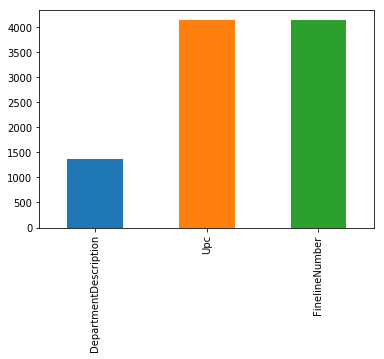

Int64Index([    25,    548,    549,    959,   1116,   1134,   1135,   1155,
              1216,   1373,
            ...
            640573, 642017, 642236, 642499, 642784, 643137, 643991, 645990,
            645991, 645992],
           dtype='int64', length=4129) Upc
\
Int64Index([    25,    548,    549,    959,   1116,   1134,   1135,   1926,
              1927,   2294,
            ...
            640573, 642017, 642236, 642499, 642784, 643137, 643991, 645990,
            645991, 645992],
           dtype='int64', length=1361) DepartmentDescription
\
Int64Index([    25,    548,    549,    959,   1116,   1134,   1135,   1155,
              1216,   1373,
            ...
            640573, 642017, 642236, 642499, 642784, 643137, 643991, 645990,
            645991, 645992],
           dtype='int64', length=4129) FinelineNumber
\


(None, None)

In [41]:
find_missing_values(train), missing_values_idx(train)

# DATA VISUALIZATION

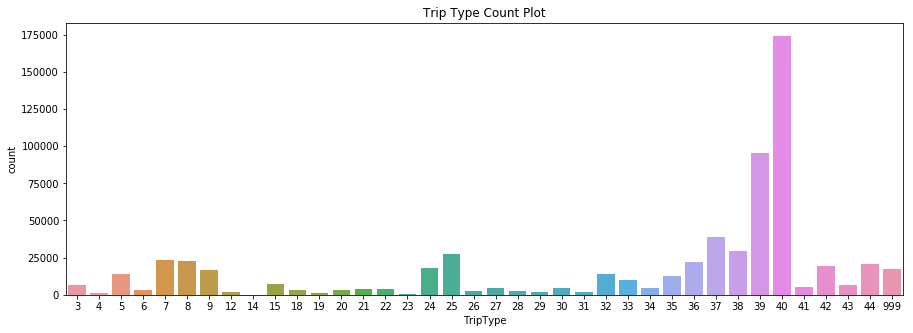

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='TripType', data=train)
plt.title('Trip Type Count Plot')
plt.show()

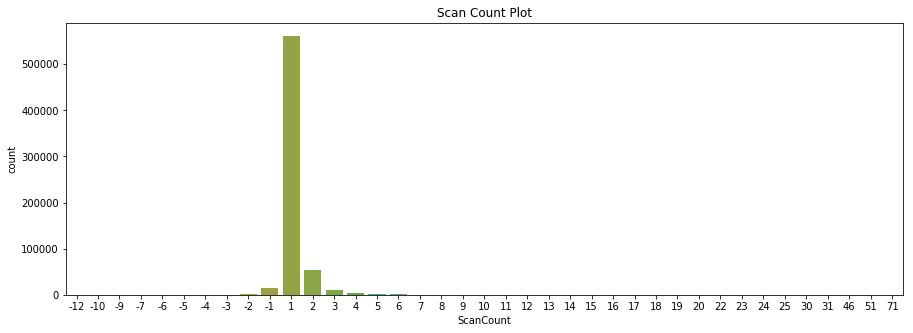

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x='ScanCount', data = train)
plt.title('Scan Count Plot')
plt.show()

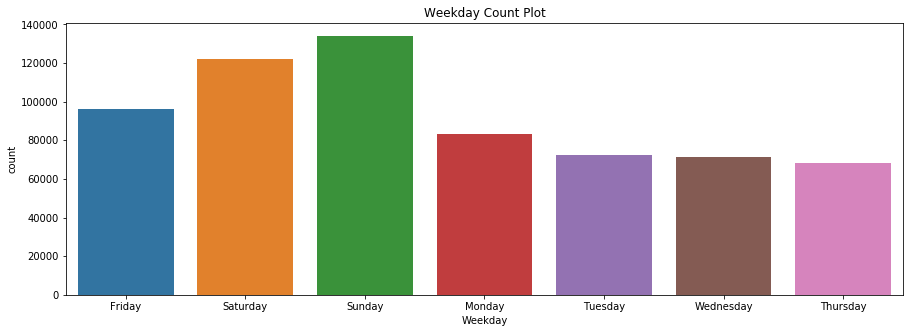

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='Weekday', data=train)
plt.title('Weekday Count Plot')
plt.show()

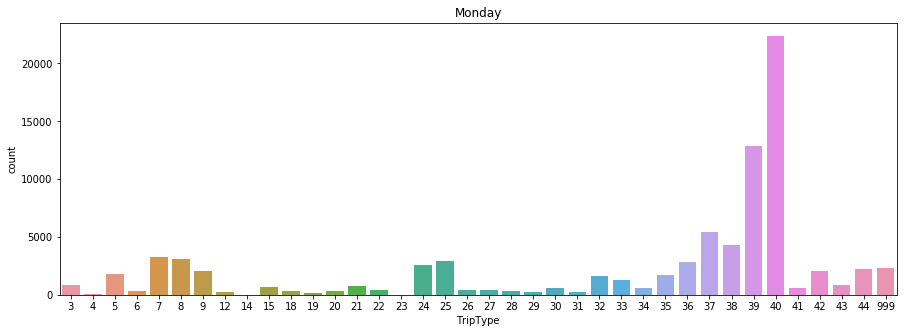

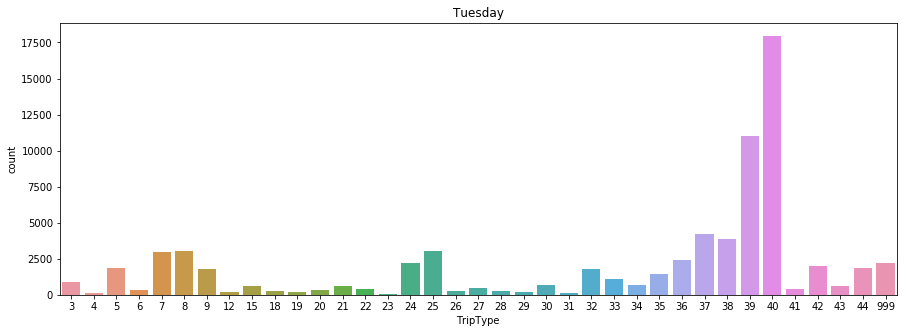

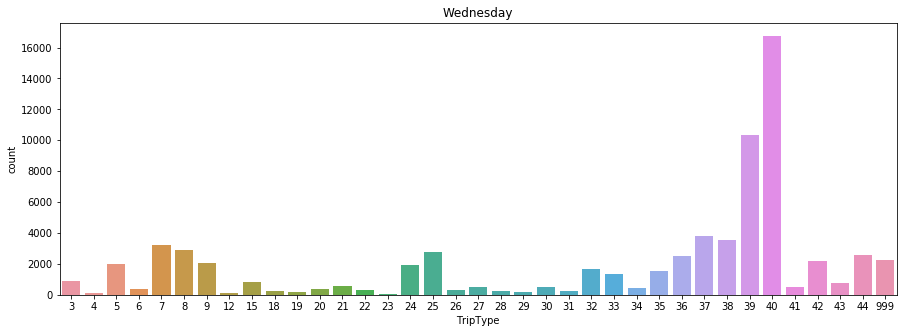

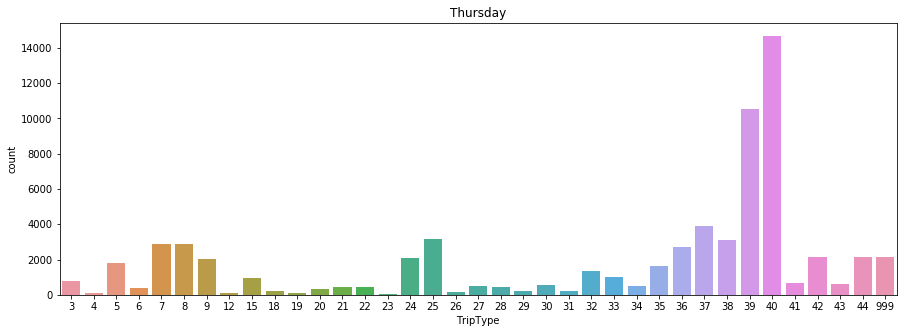

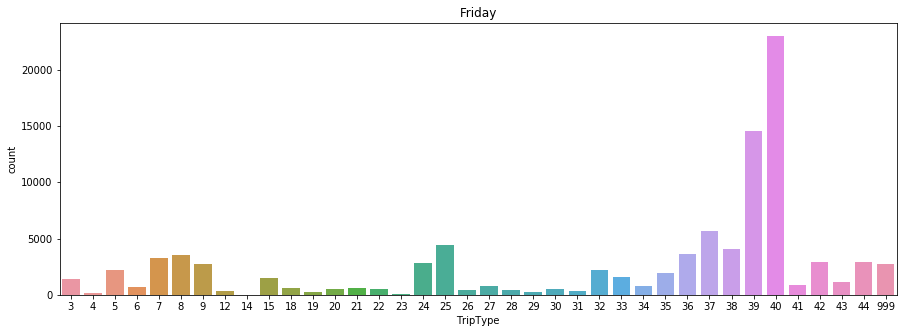

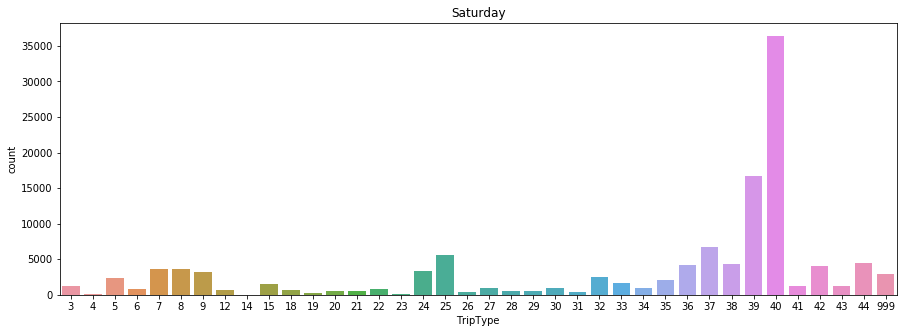

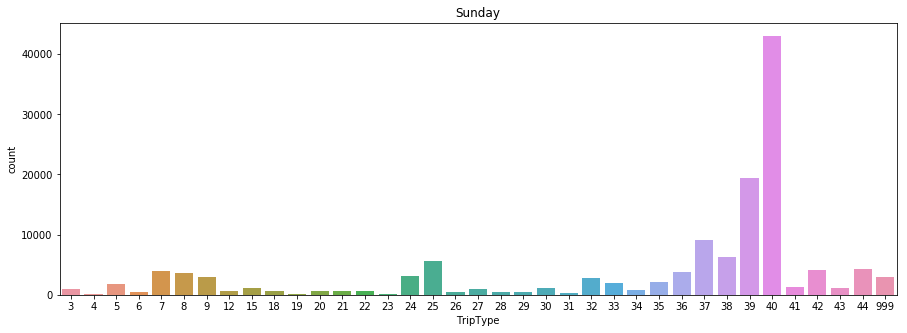

In [21]:
weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in weekday:
    tmp = train[train['Weekday'] == day]
    plt.figure(figsize=(15,5))
    sns.countplot(x='TripType', data=tmp)
    plt.title('{}'.format(day))
plt.show()

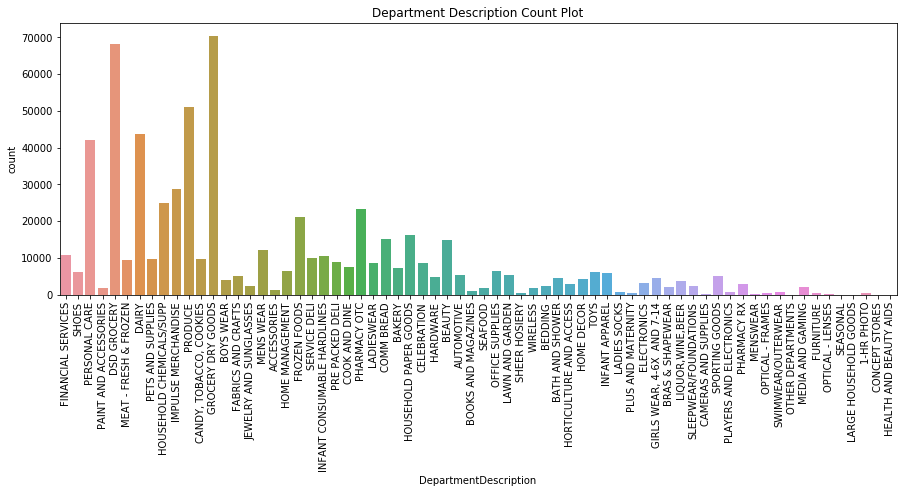

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='DepartmentDescription', data=train)
plt.title('Department Description Count Plot')
plt.xticks(rotation='vertical')
plt.show()

/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


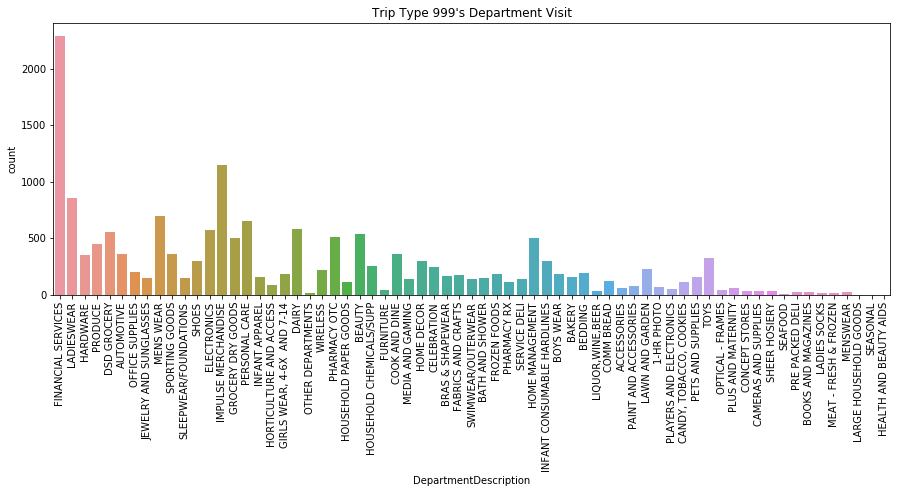

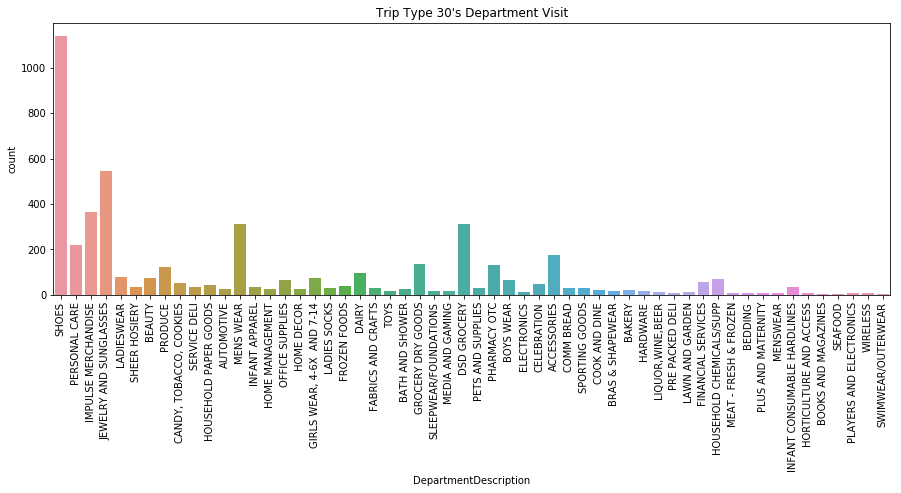

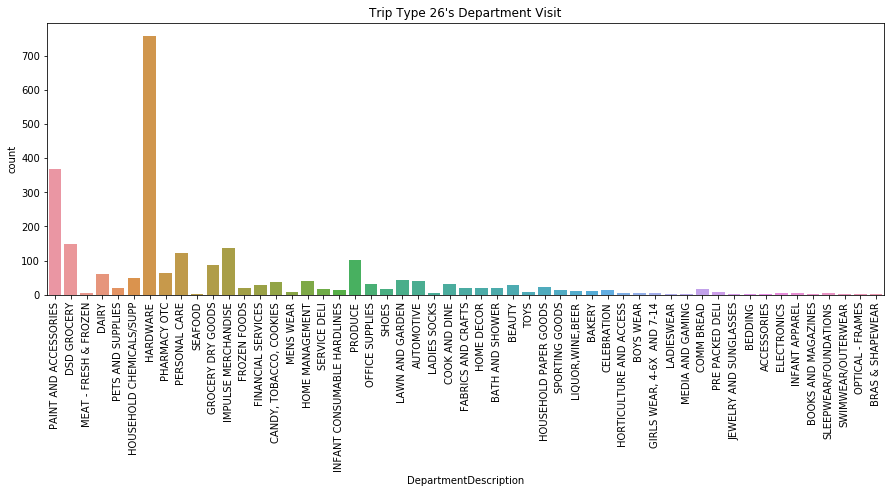

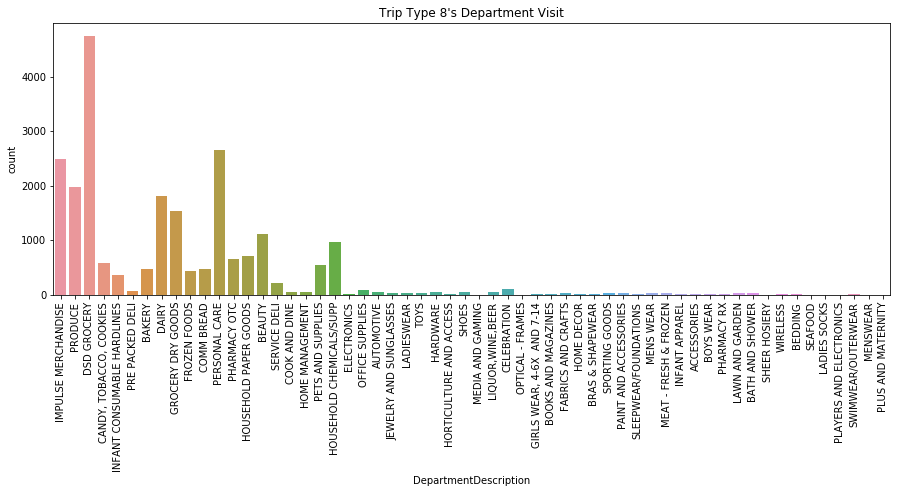

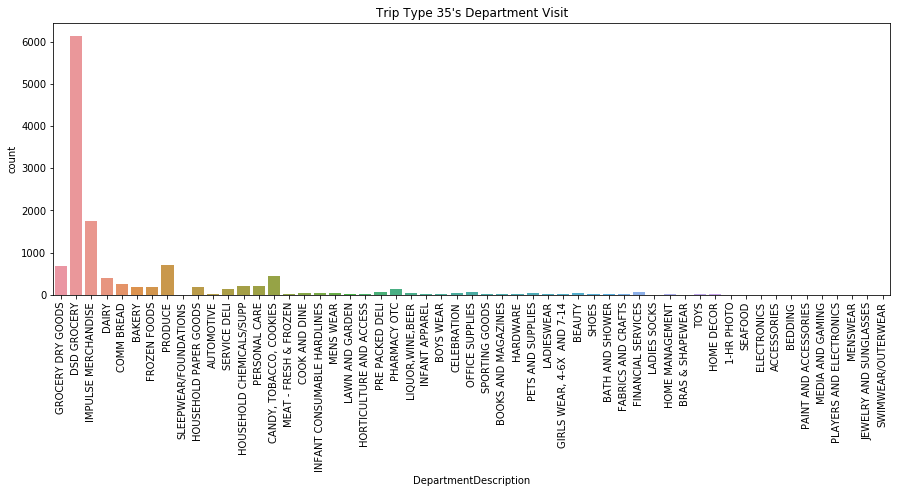

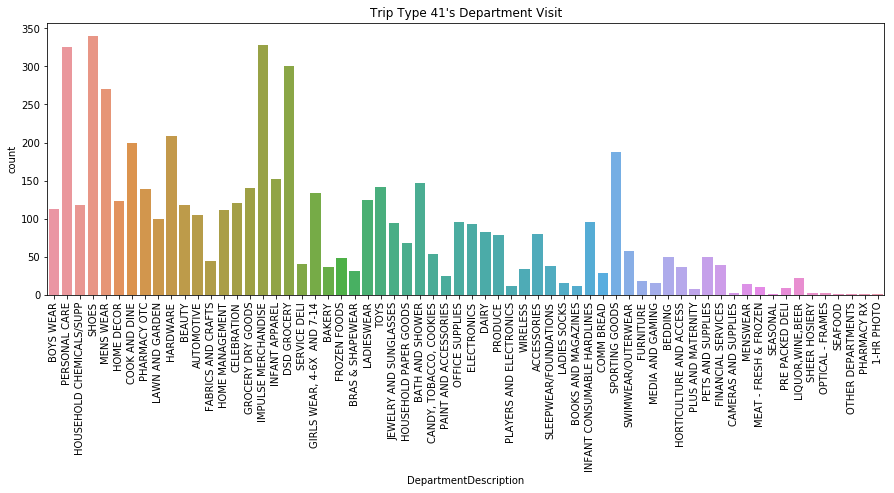

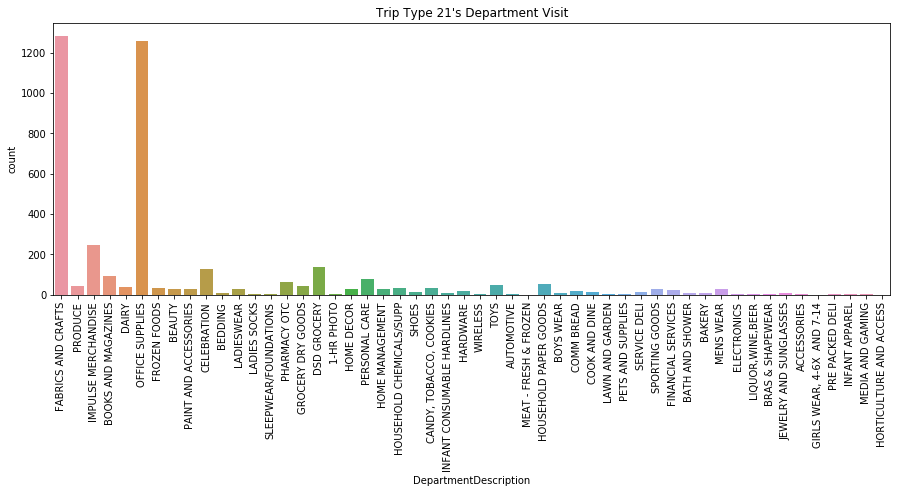

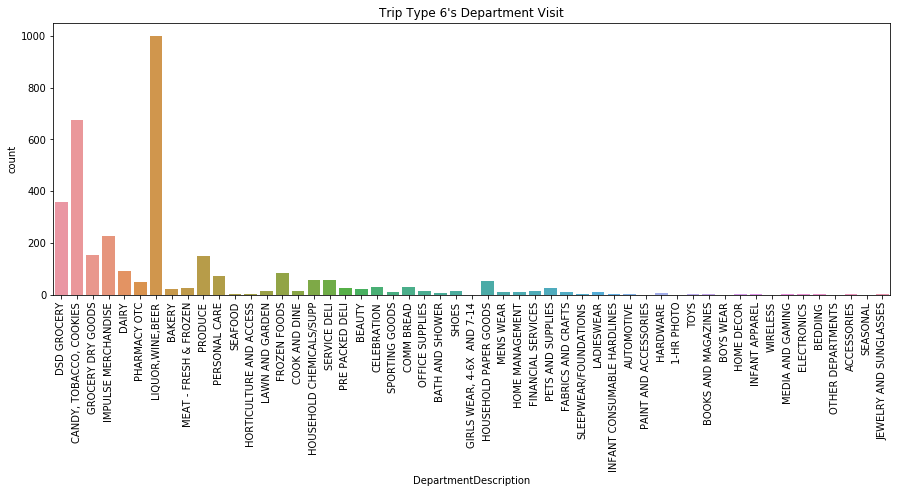

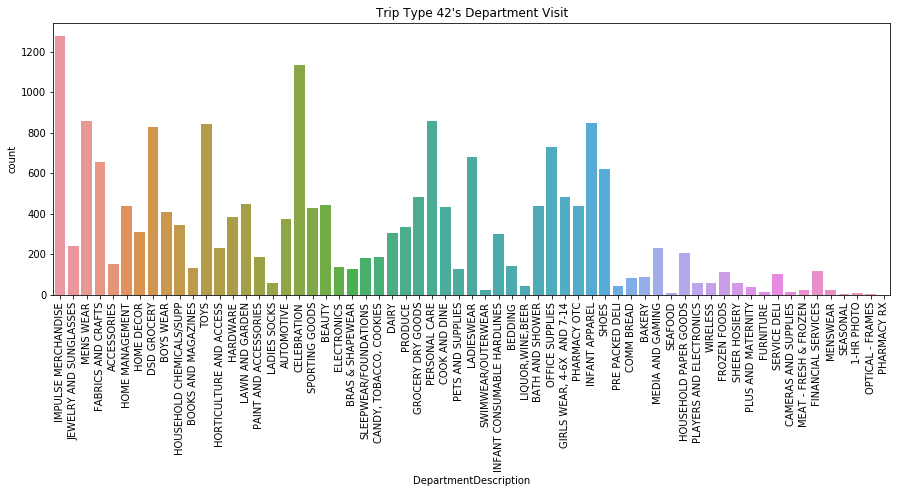

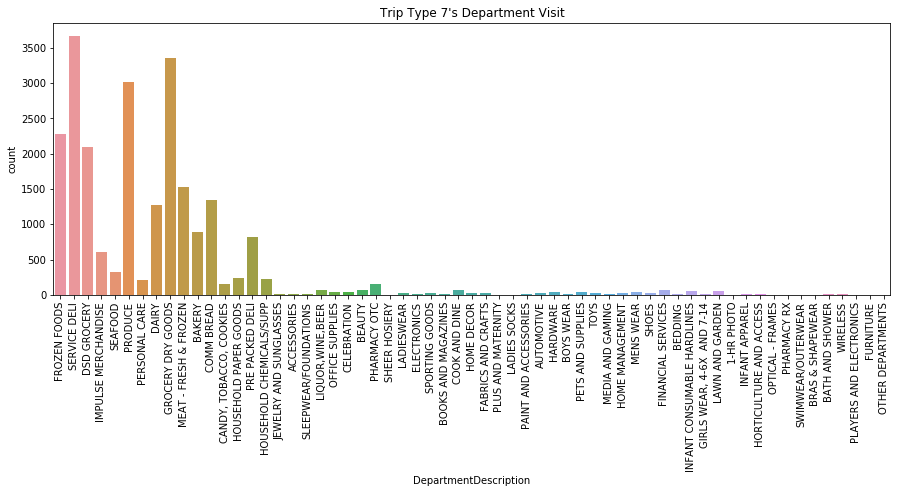

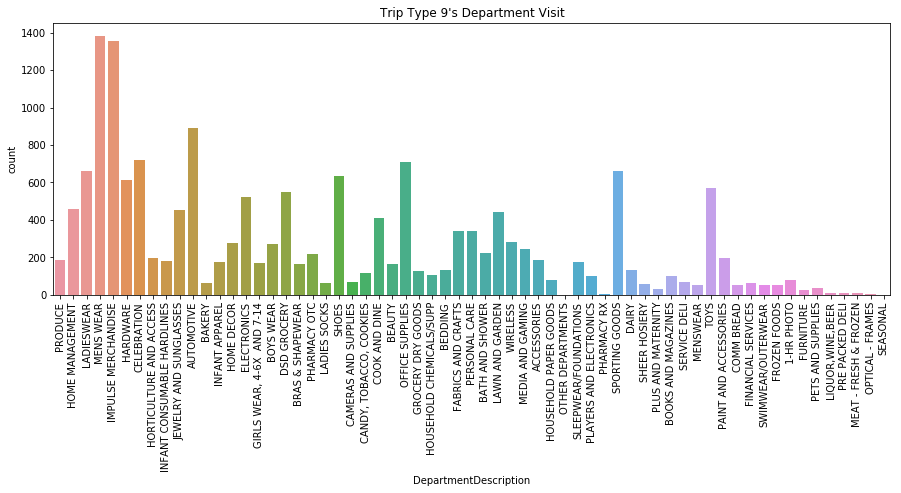

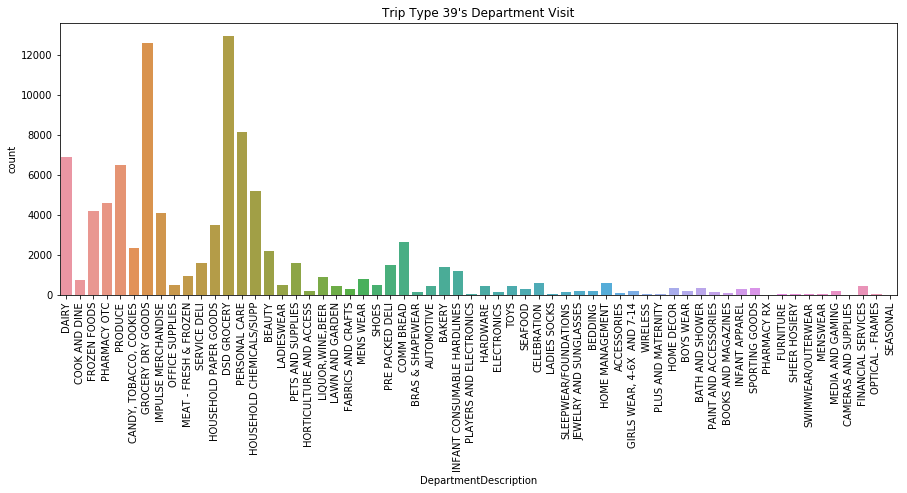

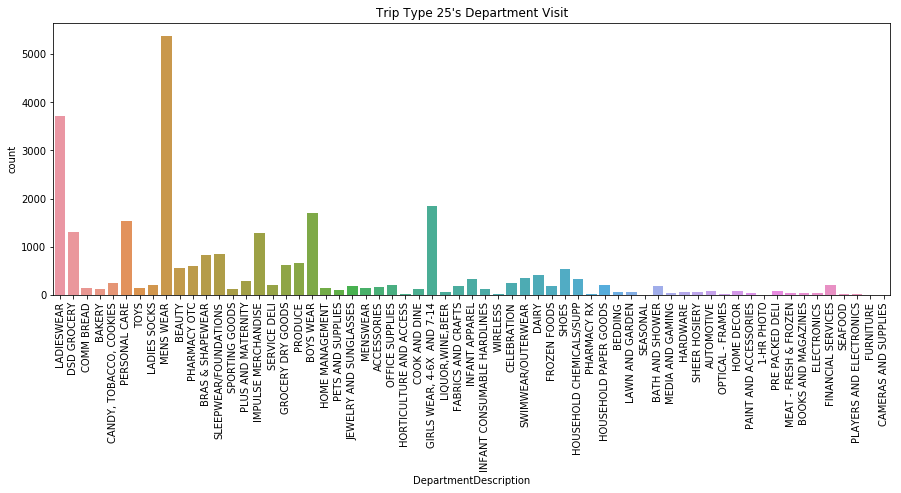

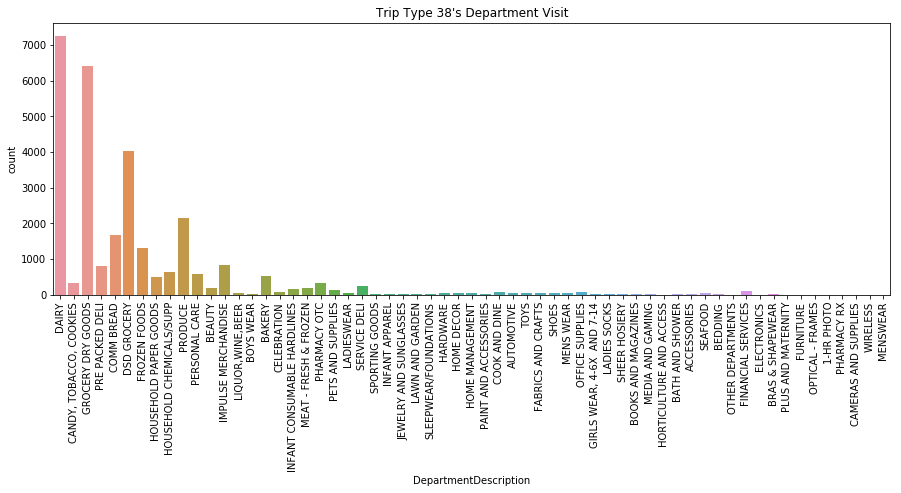

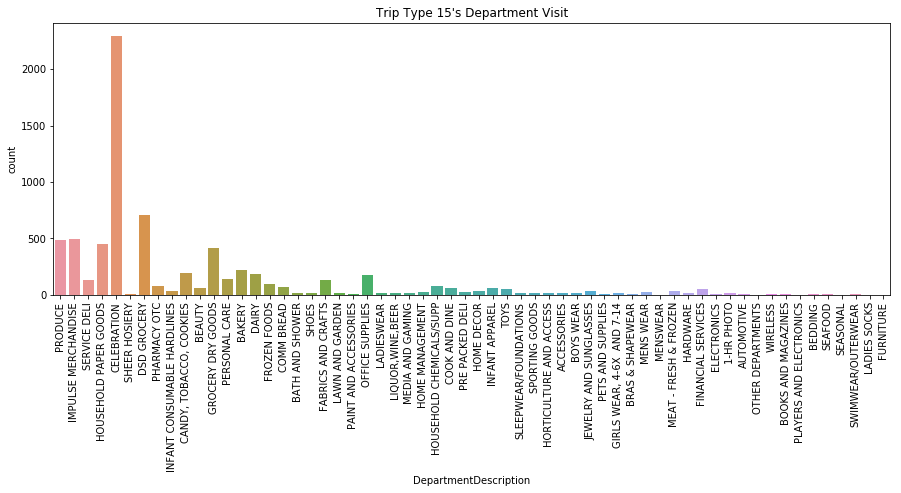

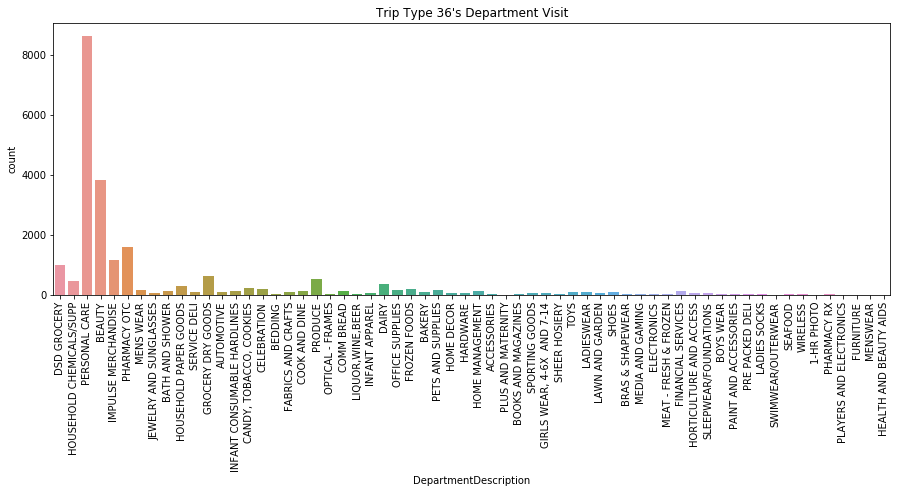

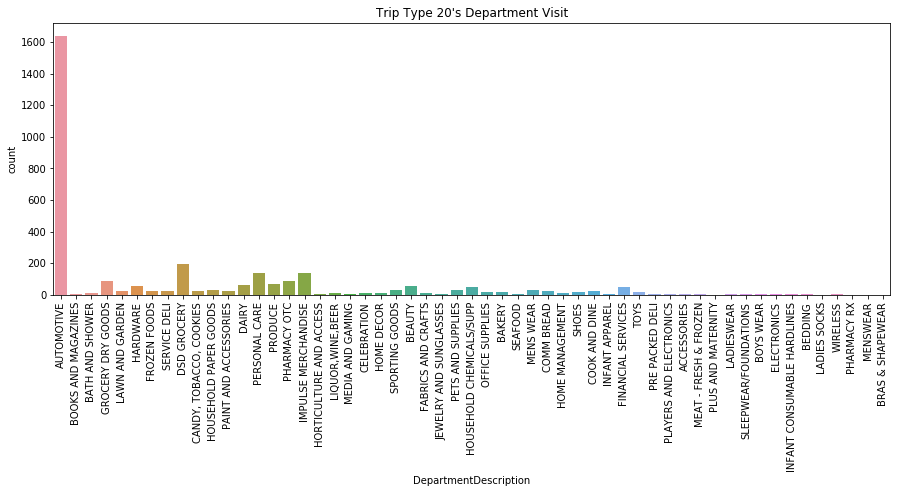

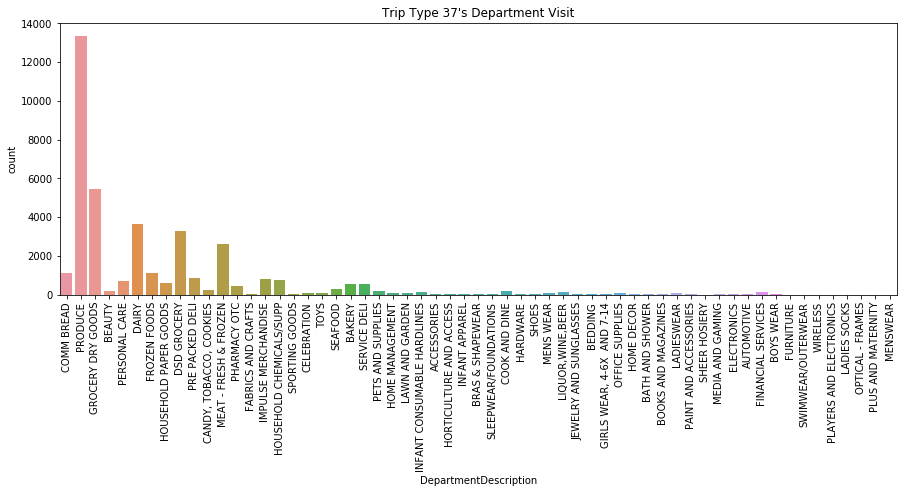

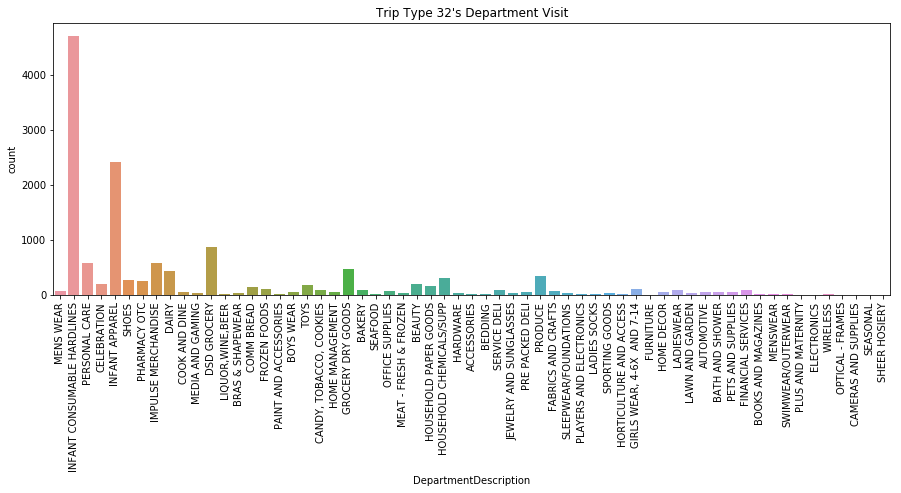

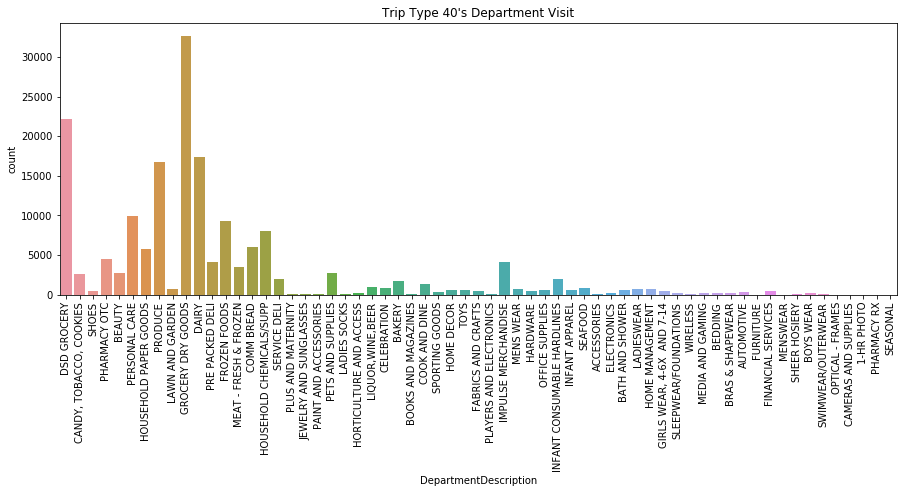

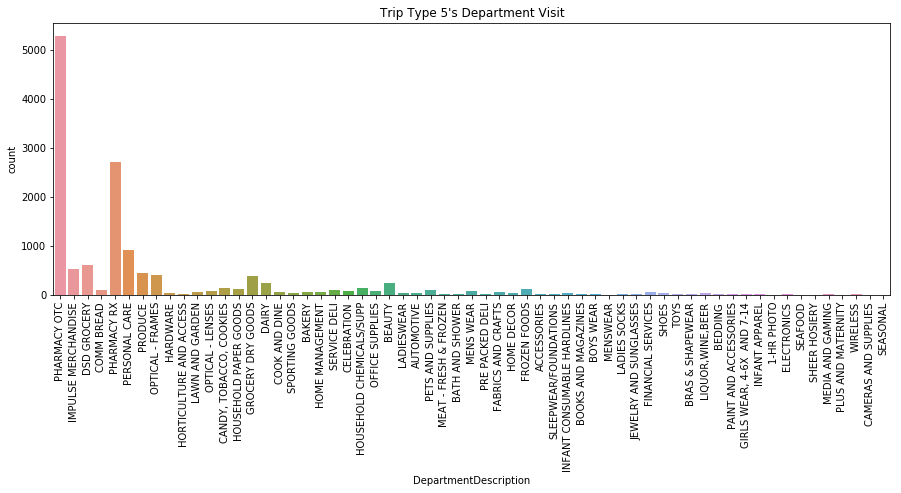

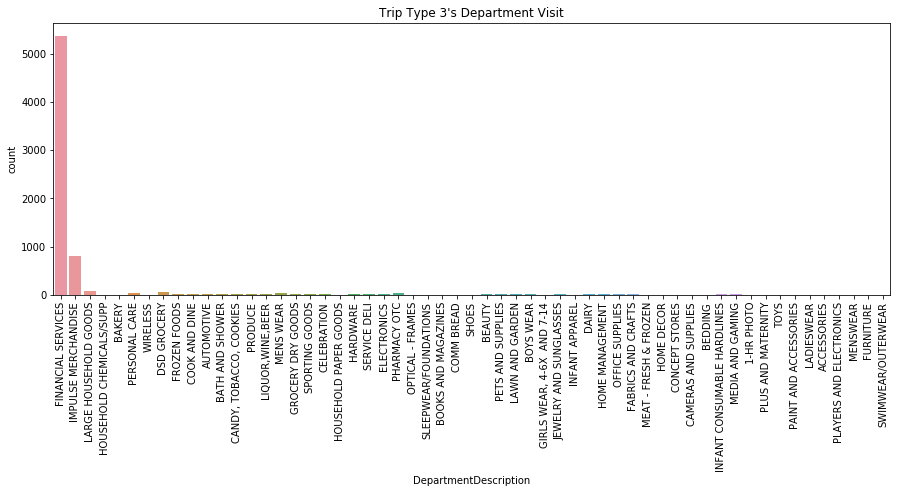

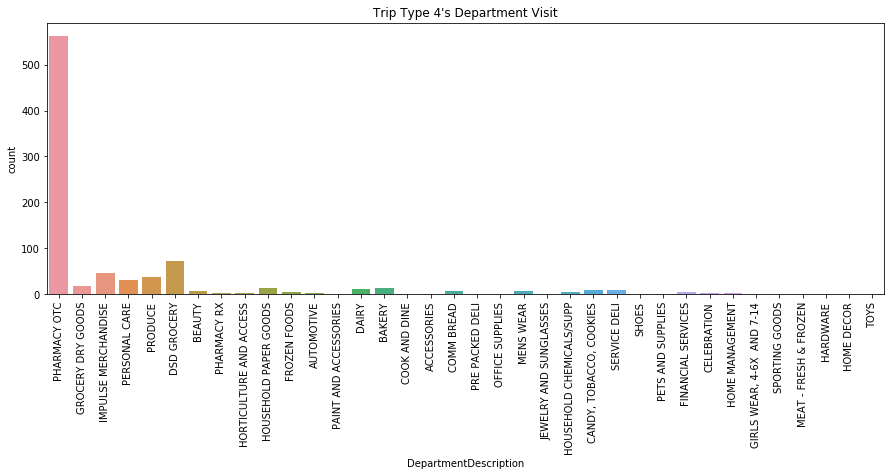

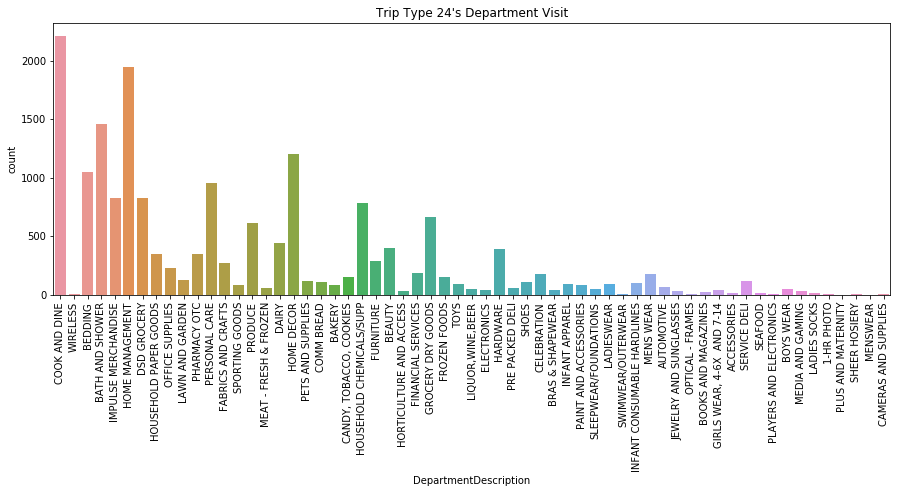

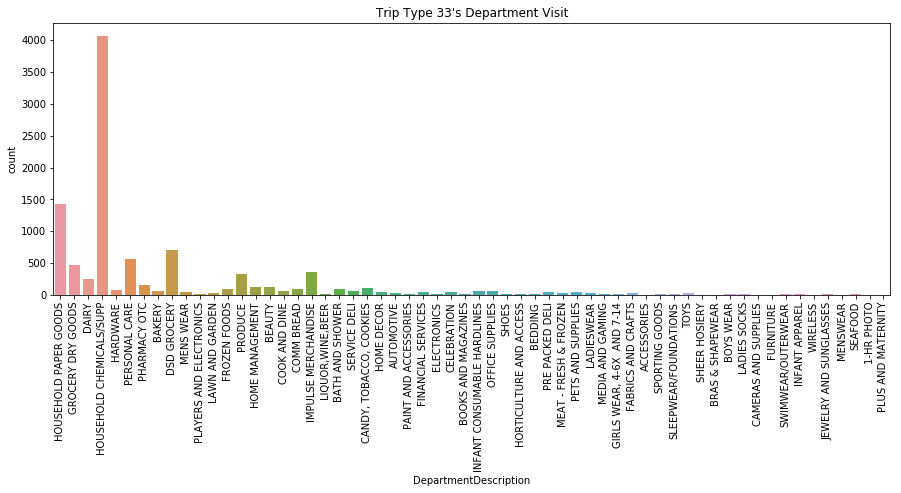

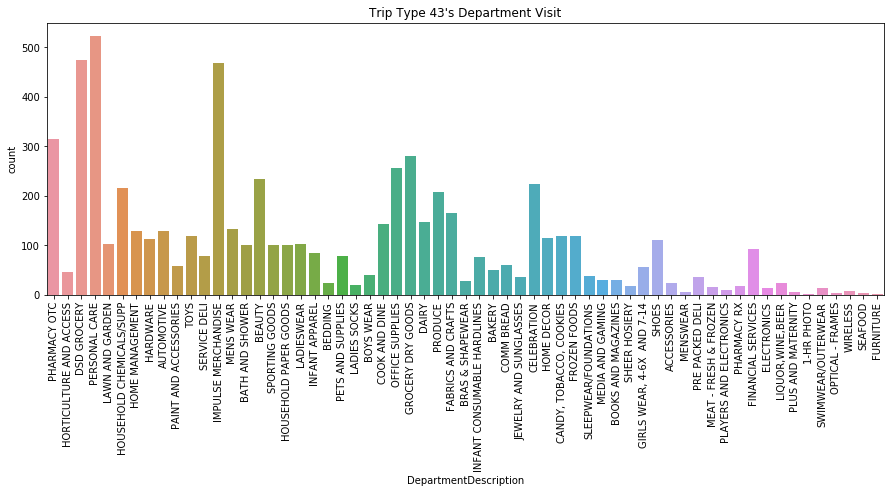

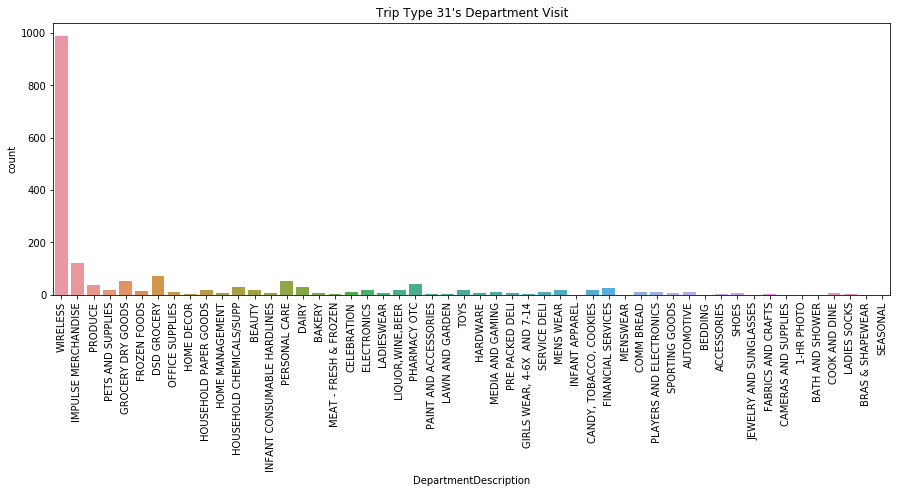

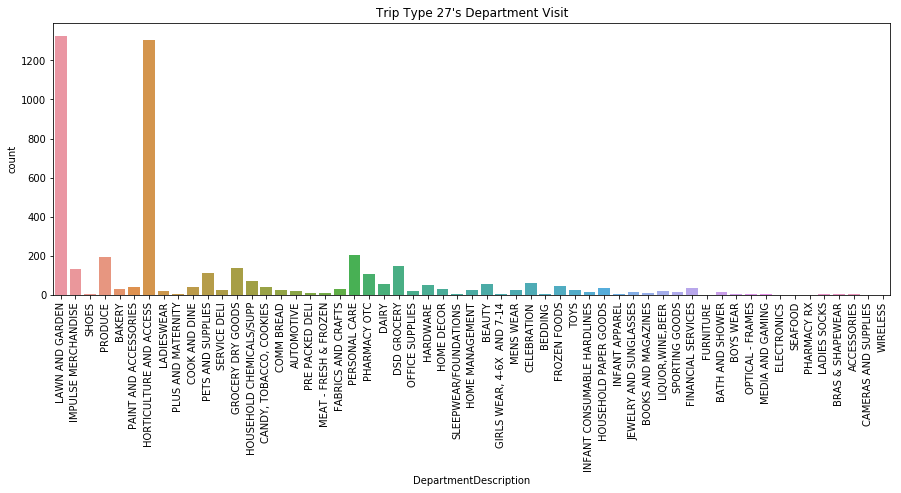

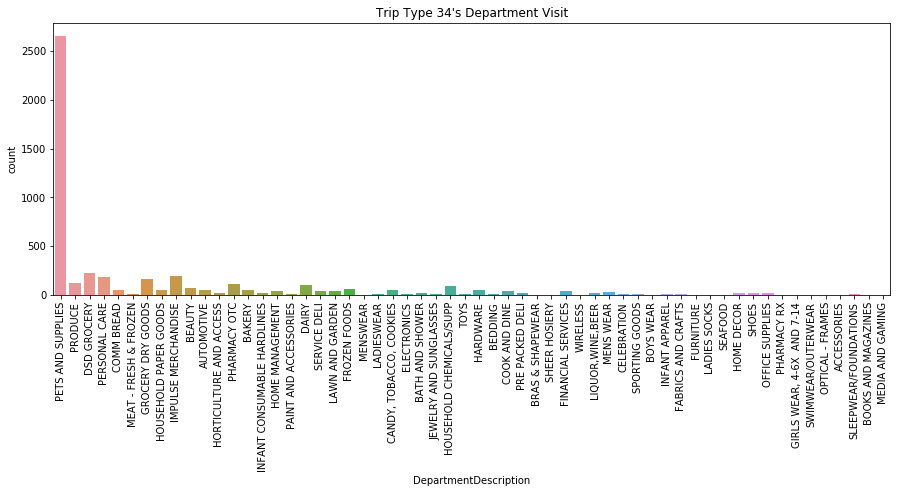

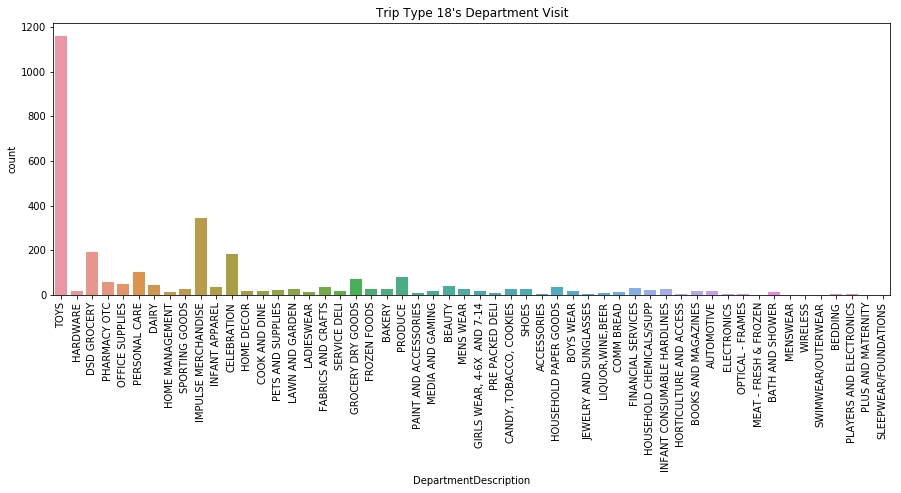

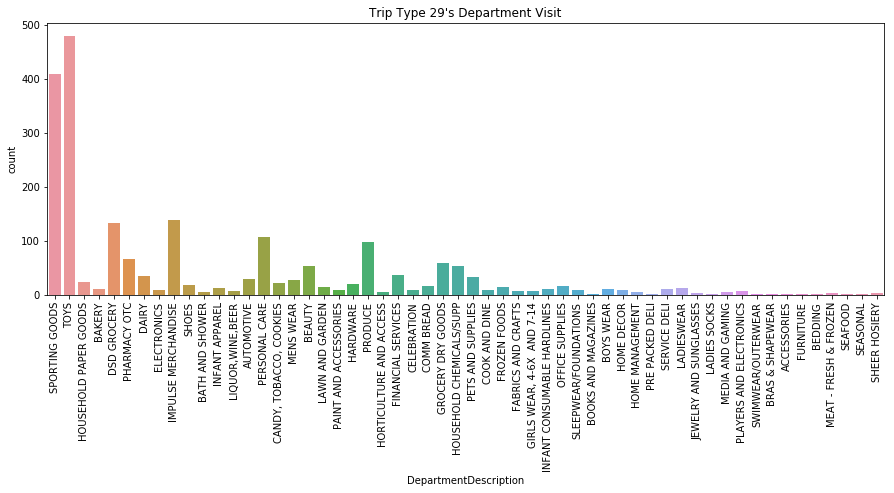

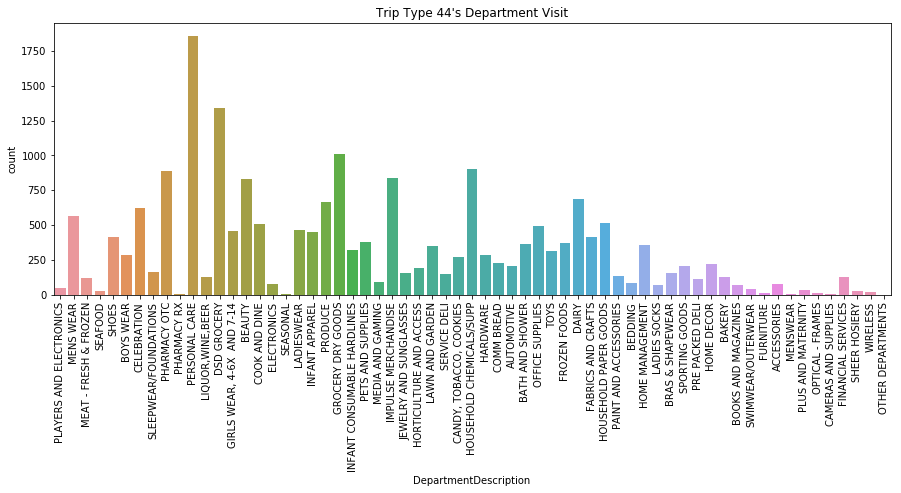

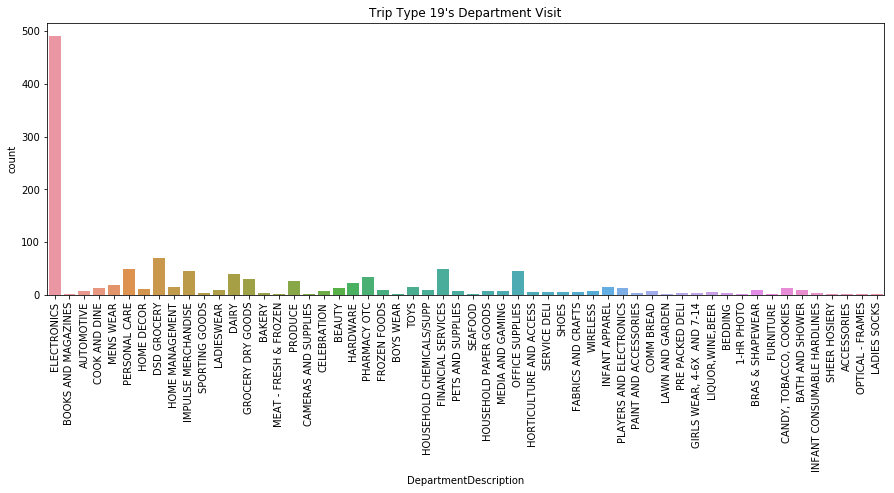

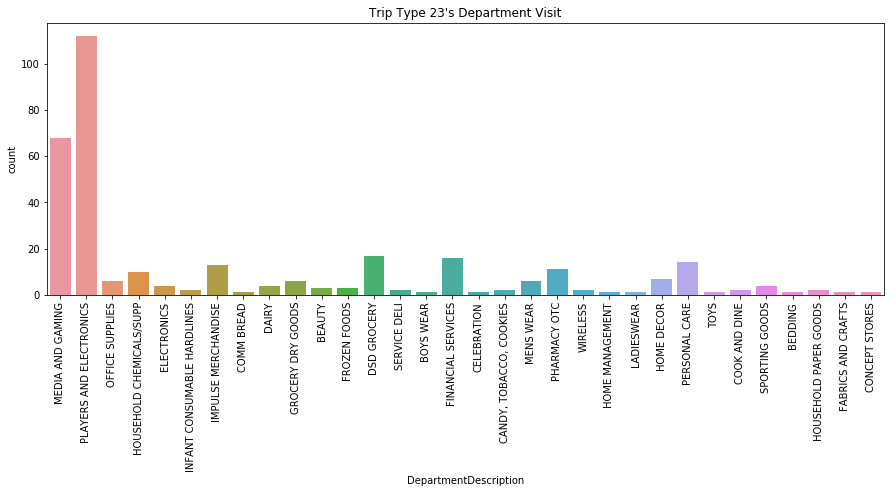

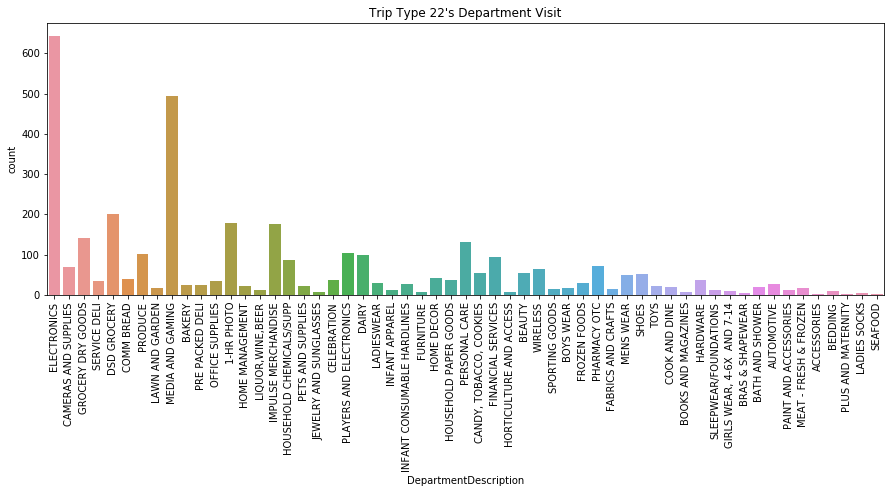

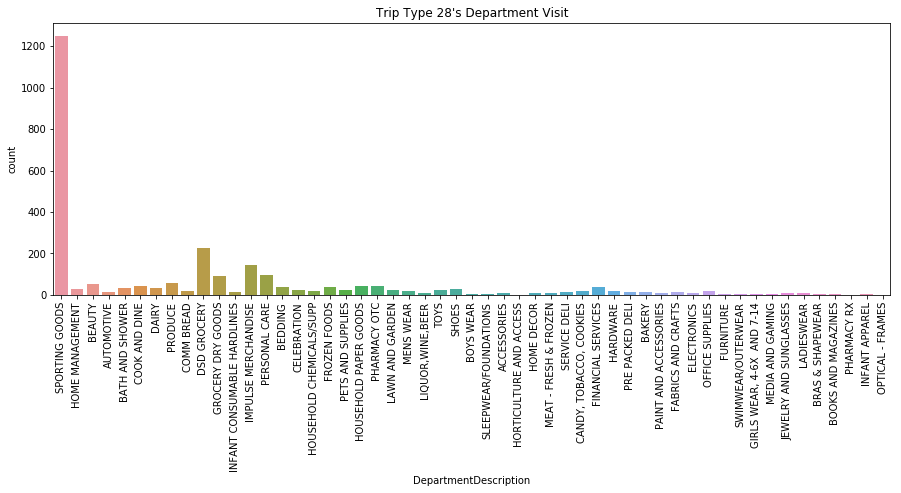

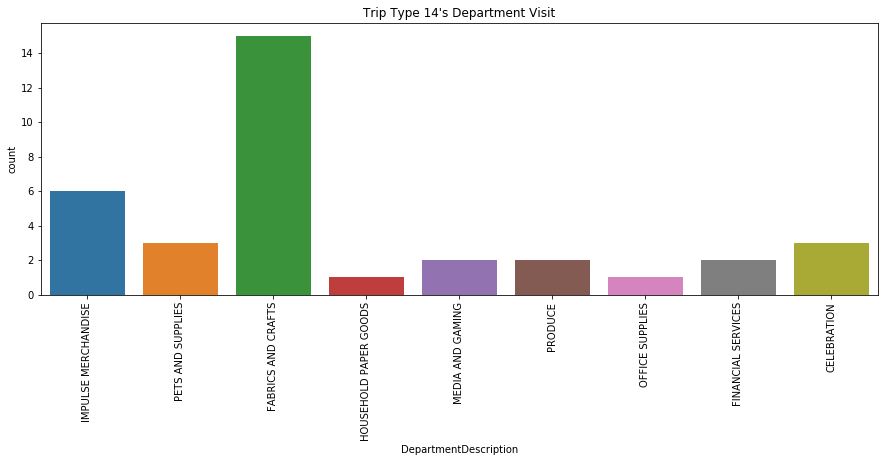

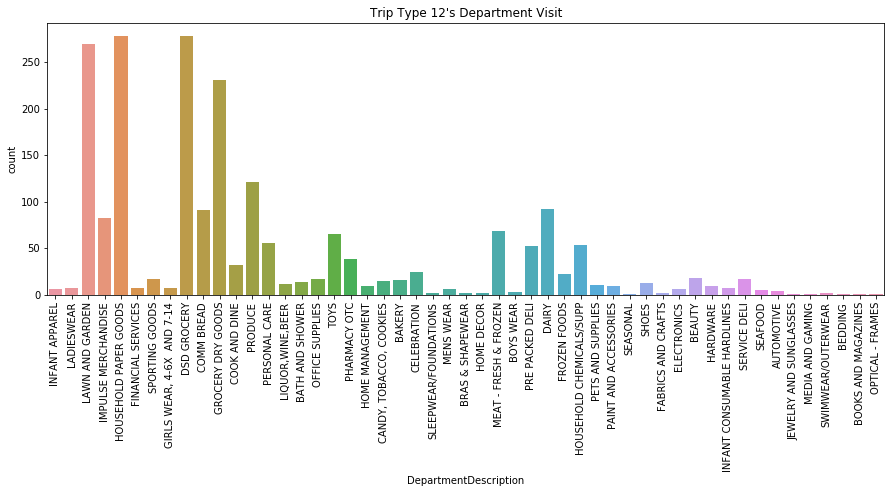

In [23]:
for num in train['TripType'].unique():
    tmp = train[train['TripType'] == num]
    plt.figure(figsize=(15,5))
    sns.countplot(x='DepartmentDescription', data=tmp)
    plt.xticks(rotation='vertical')
    plt.title("Trip Type {}'s Department Visit".format(num))
plt.show()

In [ ]:
'''
TO BE ADDED LATER ** DO NOT RUN THIS YET
'''

%matplotlib notebook
X0 = train.drop(['Upc', 'ScanCount', 'count', 'Weekday', 'DepartmentDescription'], axis=1)

for num in range(0, 7):
    X = X0[X0['weeknum'] == num]
    y = X['TripType']
    
    N =  len(X['VisitNumber'].unique())# Number of labels
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    
    fig = plt.figure(figsize=(15,8))
    ax = Axes3D(fig, elev=20, azim=10)
    ax.scatter(X['VisitNumber'], y, X['DD_num'], c=X['VisitNumber'], marker='o', s=100, cmap=cmap)
ax.mouse_init()
plt.show()

# PREPROCESSING

In [42]:
weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train['weeknum'] = np.nan
test['weeknum'] = np.nan
for idx, day in enumerate(weekday):
    train['weeknum'] = np.where(train['Weekday'] == day, idx, train['weeknum'])
    test['weeknum'] = np.where(test['Weekday'] == day, idx, test['weeknum'])

In [43]:
train['test'] = False
test['test'] = True
train_test = pd.concat([train,test], axis=0)

In [44]:
train_test['Upc'] = train_test['Upc'].fillna(value = 9999)
train_test['FinelineNumber'] = train_test['FinelineNumber'].fillna(value = 9999)
train_test['DepartmentDescription'] = train_test['DepartmentDescription'].fillna(value = 'Nodata')

In [45]:
train_test['Return'] = np.where(train_test['ScanCount'] < 0, -train_test['ScanCount'], 0)

## BY DEPARTMENT DESCRIPTION

In [46]:
dum = pd.get_dummies(train_test['DepartmentDescription'])
dum_wk = pd.get_dummies(train_test['weeknum'])
train_test[dum.columns] = dum
train_test[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']] = dum_wk
train_test.drop(['DepartmentDescription', 'FinelineNumber', 'Upc', 'Weekday'], axis =1, inplace=True)

In [47]:
train_df = train_test[train_test['test'] == False]
test_df = train_test[train_test['test'] == True]

In [48]:
train_df.drop('test', axis=1, inplace=True)
test_df.drop('test', axis=1, inplace=True)

/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
train_df = train_df.groupby(['VisitNumber', 'TripType', 'weeknum']).agg('sum').reset_index(drop=False)
test_df = test_df.groupby(['VisitNumber', 'weeknum']).agg('sum').reset_index(drop=False)

### BY DEPARTMENT DESCRIPTION LOGISTIC REGRESSION

In [50]:
train_df['TripType'] = train_df['TripType'].astype('category')
train_df['ScanCount'] = train_df['ScanCount'].astype(float)                         
train_df['VisitNumber'] = train_df['VisitNumber'].astype('category')
train_df['Return'] = train_df['Return'].astype(float)

In [51]:
test_df['TripType'] = test_df['TripType'].astype('category') 
test_df['ScanCount'] = test_df['ScanCount'].astype(float)                         
test_df['VisitNumber'] = test_df['VisitNumber'].astype('category')
test_df['Return'] = test_df['Return'].astype(float)

In [52]:
'''
모델 성능 평가를 위하여 train set을 6:4 로 나눠서 크로스 밸리데이션
'''
model_train_df, model_test_df = train_test_split(train_df, test_size = .3) 

In [53]:
model_train_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']] = np.where(model_train_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']] >= 1, 1, 0)
model_test_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']] = np.where(model_test_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']] >= 1, 1, 0)

/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [54]:
y = model_train_df['TripType']
X = model_train_df.drop(['TripType', 'VisitNumber', 'weeknum'], axis=1)

In [55]:
test_X = model_test_df.drop(['TripType', 'VisitNumber', 'weeknum'], axis=1)

In [ ]:
lr_act_model = OneVsRestClassifier(LogisticRegression()).fit(X0, y0)

In [ ]:
lr_model = OneVsRestClassifier(LogisticRegression()).fit(X, y)
y_hat = lr_model.predict(test_X)

In [72]:
y_actual = model_test_df['TripType']

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

### BY DEPARTMENT DESCRIPTION QDA

In [ ]:
qda_model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)
y_hat = pd.Series(qda_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

### BY DEPARTMENT DESCRIPTION LDA

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=len(train_df['TripType'].unique()), solver="svd", store_covariance=True).fit(X, y)
y_hat = pd.Series(lda_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

## NAIVE BAYES

### BY DEPARTMENT DESCRIPTION BERNOULLI NB

In [ ]:
bnb_model = BernoulliNB().fit(X, y)
y_hat = pd.Series(bnb_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

### BY DEPARTMENT DESCRIPTION MULTINORMIAL NB

In [ ]:
mnb_model = MultinomialNB().fit(X, y)
y_hat = pd.Series(mnb_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

### BY DEPARTMENT DESCRIPTION DECISION TREE

In [ ]:
edt_act_model = ExtraTreesClassifier(n_estimators=100, random_state=0).fit(X0,y0)

In [64]:
edt_model = ExtraTreesClassifier(n_estimators=100, random_state=0).fit(X,y)
y_hat = pd.Series(edt_model.predict(test_X)).astype('float64')

In [75]:
y_x_hat = pd.Series(edt_model.predict(X)).astype('float64')

In [73]:
confusion_matrix(y_actual, y_hat)

array([[1048,    0,    0, ...,    0,    0,    4],
       [   0,    2,  107, ...,    0,    0,    0],
       [   2,   13, 1169, ...,    1,    0,    6],
       ...,
       [   1,    0,   15, ...,    3,    0,    1],
       [   0,    0,    1, ...,    1,    6,    0],
       [ 213,    0,   23, ...,    0,    0, 1881]])

In [76]:
confusion_matrix(y, y_x_hat)

array([[2548,    0,    0, ...,    0,    0,    0],
       [   0,   93,  125, ...,    0,    0,    0],
       [   2,   17, 3121, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  614,    0,    0],
       [   0,    0,    0, ...,    0,  858,    0],
       [ 491,    0,   35, ...,    0,    0, 4967]])

In [71]:
print(classification_report(y, y_x_hat))

             precision    recall  f1-score   support

        3.0       0.79      0.99      0.88      2563
        4.0       0.79      0.42      0.55       224
        5.0       0.90      0.98      0.94      3179
        6.0       0.88      0.94      0.91       885
        7.0       0.92      0.95      0.93      3978
        8.0       0.88      0.92      0.90      8500
        9.0       0.83      0.91      0.87      6645
       12.0       0.98      0.96      0.97       191
       14.0       1.00      1.00      1.00         3
       15.0       0.99      0.93      0.96       700
       18.0       0.94      0.88      0.91       392
       19.0       0.87      0.63      0.73       252
       20.0       0.99      0.87      0.92       458
       21.0       1.00      0.96      0.98       471
       22.0       0.91      0.72      0.81       606
       23.0       0.81      0.71      0.75       106
       24.0       0.98      0.92      0.95      1854
       25.0       0.99      0.97      0.98   

In [74]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

             precision    recall  f1-score   support

      999.0       0.77      0.97      0.86      1080
       30.0       0.09      0.02      0.03       122
       26.0       0.72      0.83      0.77      1414
        8.0       0.69      0.70      0.70       392
       35.0       0.64      0.67      0.66      1774
       41.0       0.77      0.82      0.80      3661
       21.0       0.68      0.76      0.72      2819
        6.0       0.06      0.01      0.02        78
       42.0       0.00      0.00      0.00         1
        7.0       0.56      0.36      0.44       278
        9.0       0.38      0.36      0.37       157
       39.0       0.32      0.19      0.24       123
       25.0       0.53      0.54      0.54       179
       38.0       0.56      0.57      0.57       170
       15.0       0.52      0.24      0.33       322
       36.0       0.32      0.27      0.30        33
       20.0       0.58      0.53      0.55       755
       37.0       0.65      0.72      0.69   

/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy').fit(X, y)
y_hat = pd.Series(dt_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

### BY DEPARTMENT DESCRIPTION XGBOOSTING

In [ ]:
train_df['TripType'] = train_df['TripType'].astype(float)
train_df['weeknum'] = train_df['weeknum'].astype(float)  
train_df['ScanCount'] = train_df['ScanCount'].astype(float)                         
train_df['VisitNumber'] = train_df['VisitNumber'].astype(float)
train_df['Return'] = train_df['Return'].astype(float)
test_df['TripType'] = test_df['TripType'].astype(float)
test_df['weeknum'] = test_df['weeknum'].astype(float)  
test_df['ScanCount'] = test_df['ScanCount'].astype(float)                         
test_df['VisitNumber'] = test_df['VisitNumber'].astype(float)
test_df['Return'] = test_df['Return'].astype(float)

In [ ]:
xgb_model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X, y)
y_hat = pd.Series(xgb_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

##### ACTUAL MODEL

In [ ]:
xgb_act_model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X0, y0)

### BY DEPARTMENT DESCRIPTION 

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy').fit(X,y)
y_hat = pd.Series(xgb_model.predict(test_X)).astype('float64')

In [ ]:
confusion_matrix(y_actual, y_hat)

In [ ]:
train_df['TripType'] = train_df['TripType'].astype('str')
target_names = list(train_df['TripType'].unique())
print(classification_report(y_actual, y_hat, target_names=target_names))

##### ACTUAL MODEL

In [ ]:
rf_act_model = RandomForestClassifier(criterion='entropy').fit(X0,y0)

## BY FINELINE NUMBER

### BY FINELINE NUMBER BERNOULLI NAIVE BAYES

## Sumission Creator

In [ ]:
lets_test = test_df.drop(['TripType', 'VisitNumber','weeknum'], axis=1)

In [ ]:
predictions_prob = lr_act_model.predict_proba(lets_test).astype('int')
# test_df['qda_yhat'] = qda_model.predict_proba(lets_test).astype('int')
# test_df['lda_yhat'] = lda_model.predict_proba(lets_test).astype('int')
# test_df['bnb_yhat'] = bnb_model.predict_proba(lets_test).astype('int')
# test_df['mnb_yhat'] = mnb_model.predict_proba(lets_test).astype('int')
# predictions_prob = edt_act_model.predict_proba(lets_test).astype(float)
# test_df['dt_yhat'] = dt_model.predict_proba(lets_test).astype('int')
# predictions_prob = xgb_model.predict_proba(lets_test).astype('int')
# predictions_prob = rf_model.predict_proba(lets_test).astype(float)


In [ ]:
tmp_ss = sample_submission.copy()
submission_df = pd.DataFrame(predictions_prob)
submission_df.insert(0,'VisitNumber', sample_submission['VisitNumber'])
submission_df.head()

In [ ]:
submission_df.columns = sample_submission.columns
print(submission_df.shape)
submission_df.head()

In [ ]:
submission_df.to_csv('sub_lr.csv', index = False)

## RESULT

#### LR FIRST
file:///home/yjoung90/Documents/datascience/teamproject2/capture/lr_1.png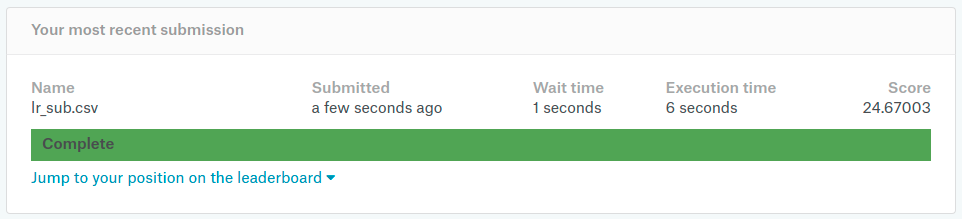

#### LDA FIRST
file:///home/yjoung90/Documents/datascience/teamproject2/capture/lda_first.png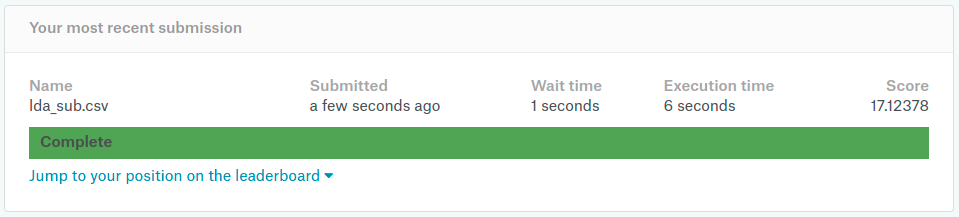

#### QDA FIRST
file:///home/yjoung90/Documents/datascience/teamproject2/capture/qda_first.png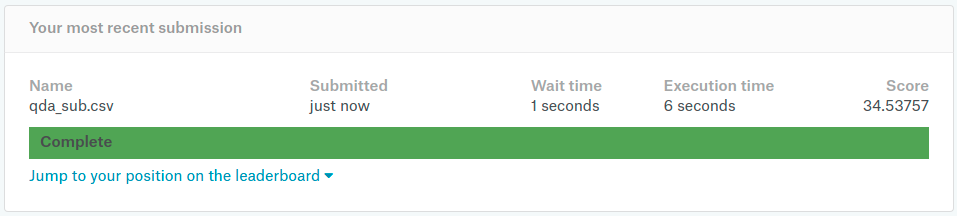

#### BNB FIRST
file:///home/yjoung90/Documents/datascience/teamproject2/capture/bnb_first.png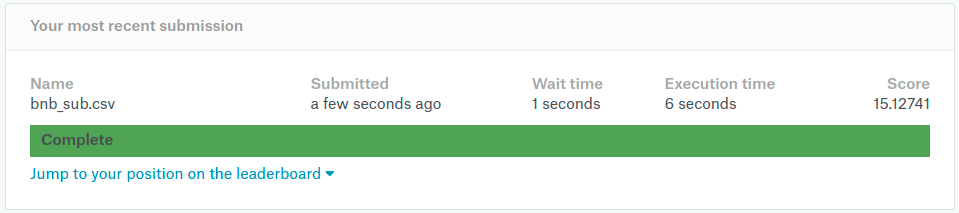

#### DT FIRST
file:///home/yjoung90/Documents/datascience/teamproject2/capture/dt_first.png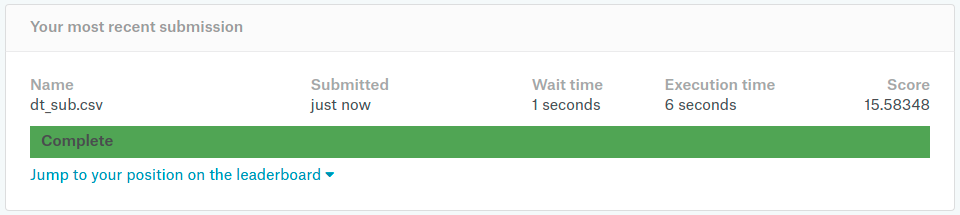

#### LR SECOND
file:///home/yjoung90/Documents/datascience/teamproject2/capture/lr_second.png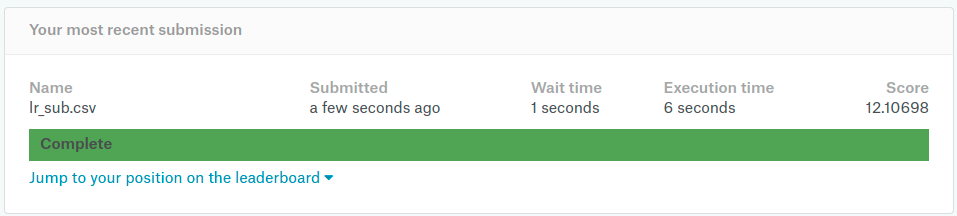

#### BNB SECOND
file:///home/yjoung90/Documents/datascience/teamproject2/capture/bnb_second.png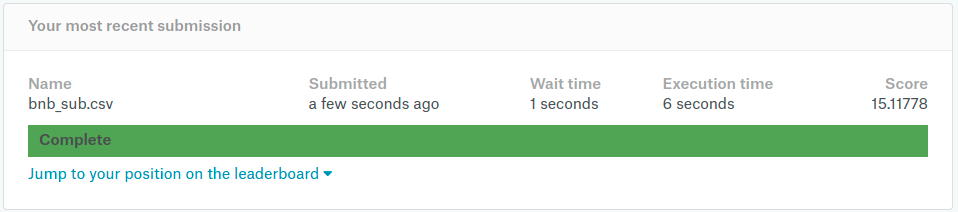